In [20]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from sklearn.model_selection import *
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

import time 

In [1]:
from src.features_generation import feature_engineering

In [2]:
X, y, X_sub, sample_submission = feature_engineering()

In [3]:
X.fillna(-999, inplace=True)

In [4]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
y.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X, y)

In [7]:
y_sm.value_counts()

1    569877
0    569877
Name: isFraud, dtype: int64

In [8]:
from sklearn import preprocessing

In [9]:
x = X_sm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_sm = pd.DataFrame(x_scaled)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [11]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
300864,0.002433,1.00,0.566567,0.792370,0.934146,1.0,0.942557,0.50,0.820663,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,0.444444,0.00,0.666667,0.75
1115409,0.000987,0.00,0.822603,0.173701,0.940716,1.0,0.974662,0.25,0.000000,0.000000,...,0.857143,1.000000,0.404762,0.608696,1.000000,1.000000,0.666667,0.00,0.666667,0.00
577750,0.000931,0.75,0.480513,0.000000,0.934146,1.0,0.991100,0.50,0.863548,0.986376,...,0.428571,0.000000,0.404762,0.673913,0.412955,0.074074,0.666667,0.75,0.444444,0.00
427996,0.007820,0.50,0.493332,0.874296,0.934146,0.0,0.903722,0.25,0.860299,0.986376,...,0.000000,0.816327,0.404762,0.652174,0.497976,0.078704,0.444444,0.00,0.000000,0.00
496447,0.005879,1.00,0.931536,0.931207,0.934146,1.0,0.991100,0.25,0.853801,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,0.555556,0.00,0.666667,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.000775,0.25,0.908025,0.971857,0.982927,1.0,0.919094,0.50,0.841455,1.000000,...,0.428571,0.714286,0.404762,0.608696,0.165992,0.745370,0.555556,0.00,0.444444,0.00
259178,0.011200,1.00,0.904058,0.694184,0.934146,1.0,0.991100,0.25,0.860299,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,0.444444,0.00,0.666667,0.75
131932,0.001840,1.00,0.488618,0.825516,0.934146,1.0,0.991100,0.50,0.781676,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,1.000000,0.00,0.666667,0.75
671155,0.001620,1.00,0.808577,0.731082,0.934146,0.5,0.890777,0.25,0.730994,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,0.000000,0.00,0.666667,0.75


In [12]:
X_train['y_train'] = y_train

<ipython-input-12-7a0d0ab398b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train'] = y_train


In [13]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,y_train
300864,0.002433,1.00,0.566567,0.792370,0.934146,1.0,0.942557,0.50,0.820663,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.000000,0.444444,0.00,0.666667,0.75,0
1115409,0.000987,0.00,0.822603,0.173701,0.940716,1.0,0.974662,0.25,0.000000,0.000000,...,1.000000,0.404762,0.608696,1.000000,1.000000,0.666667,0.00,0.666667,0.00,1
577750,0.000931,0.75,0.480513,0.000000,0.934146,1.0,0.991100,0.50,0.863548,0.986376,...,0.000000,0.404762,0.673913,0.412955,0.074074,0.666667,0.75,0.444444,0.00,1
427996,0.007820,0.50,0.493332,0.874296,0.934146,0.0,0.903722,0.25,0.860299,0.986376,...,0.816327,0.404762,0.652174,0.497976,0.078704,0.444444,0.00,0.000000,0.00,0
496447,0.005879,1.00,0.931536,0.931207,0.934146,1.0,0.991100,0.25,0.853801,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.000000,0.555556,0.00,0.666667,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.000775,0.25,0.908025,0.971857,0.982927,1.0,0.919094,0.50,0.841455,1.000000,...,0.714286,0.404762,0.608696,0.165992,0.745370,0.555556,0.00,0.444444,0.00,0
259178,0.011200,1.00,0.904058,0.694184,0.934146,1.0,0.991100,0.25,0.860299,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.000000,0.444444,0.00,0.666667,0.75,0
131932,0.001840,1.00,0.488618,0.825516,0.934146,1.0,0.991100,0.50,0.781676,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.000000,1.000000,0.00,0.666667,0.75,0
671155,0.001620,1.00,0.808577,0.731082,0.934146,0.5,0.890777,0.25,0.730994,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.000000,0.000000,0.00,0.666667,0.75,1


In [14]:
X_train = X_train.sample(frac=1).reset_index(drop=True)

In [15]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,y_train
0,0.000767,1.00,0.706024,0.738433,0.934146,1.0,0.923040,0.25,0.730400,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.00,0.666667,0.00,0.666667,0.75,1
1,0.002875,1.00,0.051334,0.946216,0.934146,0.5,0.989482,0.25,0.803514,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.00,0.000000,0.00,0.666667,0.75,1
2,0.003873,1.00,0.484479,0.732134,0.934146,0.5,0.989950,0.50,0.875957,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.00,0.444444,0.00,0.666667,0.75,1
3,0.001093,0.75,0.460278,0.917589,0.934146,1.0,0.991100,0.25,0.831486,0.986376,...,0.836735,0.404762,0.673913,0.157895,0.75,0.666667,0.75,0.888889,0.00,1
4,0.000738,0.00,0.855656,0.965604,0.962602,1.0,0.919903,0.50,0.000000,0.000000,...,1.000000,0.428571,0.652174,1.000000,1.00,0.444444,0.00,0.444444,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797822,0.001807,1.00,0.399230,0.849906,0.934146,1.0,0.942557,0.50,0.768681,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.00,0.666667,0.75,0.666667,0.75,0
797823,0.003029,1.00,0.979248,0.902439,0.934146,1.0,0.991100,0.25,0.863548,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.00,0.444444,0.00,0.666667,0.75,0
797824,0.001840,1.00,0.256036,0.957473,0.934146,0.5,0.989482,0.50,0.742040,0.986376,...,1.000000,0.738095,0.934783,1.000000,1.00,0.666667,0.75,0.666667,0.75,0
797825,0.001062,0.00,0.450908,0.913788,0.962602,0.5,0.982364,0.25,0.000000,0.000000,...,1.000000,0.428571,0.608696,1.000000,1.00,0.444444,0.00,0.444444,0.00,1


In [16]:
X_train_sub1 = X_train.iloc[list(range(3000))]

In [17]:
y_train_sub1 = X_train_sub1['y_train']
y_train_sub1

0       1
1       1
2       1
3       1
4       1
       ..
2995    1
2996    1
2997    0
2998    0
2999    1
Name: y_train, Length: 3000, dtype: int64

In [18]:
X_train_sub1.drop(columns=['y_train'], inplace=True)
X_train_sub1

C:\Users\chinh\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.000767,1.00,0.706024,0.738433,0.934146,1.0,0.923040,0.25,0.730400,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,0.666667,0.00,0.666667,0.75
1,0.002875,1.00,0.051334,0.946216,0.934146,0.5,0.989482,0.25,0.803514,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,0.000000,0.00,0.666667,0.75
2,0.003873,1.00,0.484479,0.732134,0.934146,0.5,0.989950,0.50,0.875957,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,0.444444,0.00,0.666667,0.75
3,0.001093,0.75,0.460278,0.917589,0.934146,1.0,0.991100,0.25,0.831486,0.986376,...,0.285714,0.836735,0.404762,0.673913,0.157895,0.750000,0.666667,0.75,0.888889,0.00
4,0.000738,0.00,0.855656,0.965604,0.962602,1.0,0.919903,0.50,0.000000,0.000000,...,0.857143,1.000000,0.428571,0.652174,1.000000,1.000000,0.444444,0.00,0.444444,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000824,0.00,0.530984,0.698153,0.962602,1.0,0.919509,0.25,0.000000,0.000000,...,0.857143,1.000000,0.214286,0.673913,1.000000,1.000000,0.444444,0.00,0.444444,0.00
2996,0.004515,1.00,0.202460,0.709725,0.934146,0.5,0.989482,0.50,0.930707,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,0.666667,0.75,0.666667,0.75
2997,0.004218,1.00,0.101862,0.944966,0.934146,1.0,0.991100,0.50,0.742040,0.986376,...,0.857143,1.000000,0.738095,0.934783,1.000000,1.000000,0.666667,0.75,0.666667,0.75
2998,0.003123,0.25,0.283858,0.694184,0.934146,1.0,0.939320,0.25,0.981806,0.986376,...,0.428571,0.000000,0.404762,0.586957,0.303644,0.055556,0.444444,0.00,0.666667,0.75


In [23]:
#SVM
#GridSearch
parameters = {'kernel':('linear', 'rbf'), 'C':np.linspace(1, 10, 10)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_sub1,y_train_sub1)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'kernel': ('linear', 'rbf')})

In [24]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 8.0, 'kernel': 'linear'}
0.79


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [26]:
#Test set
y_pred = clf.predict(X_test)

In [27]:
f1_score(y_test, y_pred)

0.7815401221279614

In [28]:
from sklearn import metrics
y_score = clf.decision_function(X_test)

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)

In [30]:
y_score

array([-0.84965865, -1.243466  ,  2.65409988, ...,  0.56518842,
        3.4167555 , -0.77403986])

In [31]:
metrics.auc(fpr, tpr)

0.8669759628650949

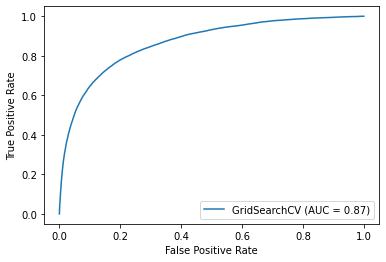

In [32]:
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()